In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
from scripts.data_cleaning import get_data, clean_data, check_missing_values

# Load the data

In [17]:
dataset = get_data(os.path.join('..', 'data', 'spotify_data.csv'))
dataset.replace('None', np.nan, inplace=True)
dataset.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.043,0.694,0.000,0.115,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.026,0.477,0.000,0.097,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.032,0.338,0.000,0.089,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.036,0.807,0.000,0.080,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.030,0.073,0.019,0.110,0.217,171.864,244320,4


# Data cleaning

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159749 non-null  object 
 2   track_name        1159763 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  

In [19]:
dataset.shape

(1159764, 20)

In [20]:
check_missing_values(dataset)

There are 16 missing values in the dataset


16

We can get some descriptive statistics of the dataset

In [21]:
pd.set_option('display.float_format', '{:.3f}'.format)
dataset.describe()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.043,0.694,0.000,0.115,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.026,0.477,0.000,0.097,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.032,0.338,0.000,0.089,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.036,0.807,0.000,0.080,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.030,0.073,0.019,0.110,0.217,171.864,244320,4


In [ ]:
dataset.head()

we can now remove the missing values
we also want to remove the redundant `id` column as it does not provide any useful information

we can see that `loudness` goes up to 6.172, which is not possible according to the Spotify API documentation.

we can also see that `time_signature` has a minimum value of 0 while the minimum value should be 3.

In [22]:
dataset = clean_data(dataset)
assert check_missing_values(dataset) == 0

No missing values in the dataset


In [23]:
dataset.describe()

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1144681.000,1144681.000,1144681.000,1144681.000,1144681.000,1144681.000,1144681.000,1144681.000,1144681.000,1144681.000,1144681.000,1144681.000,1144681.000,1144681.000,1144681.000
mean,18.419,2011.953,0.540,0.642,5.289,-8.926,0.634,0.092,0.319,0.251,0.223,0.458,121.619,250022.154,3.922
std,15.896,6.803,0.183,0.269,3.555,5.598,0.482,0.125,0.353,0.364,0.201,0.268,29.509,148231.968,0.335
min,0.000,2000.000,0.022,0.000,0.000,-58.100,0.000,0.022,0.000,0.000,0.006,0.000,30.766,15000.000,3.000
25%,5.000,2006.000,0.416,0.458,2.000,-10.756,0.000,0.037,0.006,0.000,0.098,0.229,99.021,181707.000,4.000
50%,15.000,2012.000,0.552,0.695,5.000,-7.425,1.000,0.051,0.144,0.002,0.134,0.440,121.990,226080.000,4.000
75%,29.000,2018.000,0.678,0.873,8.000,-5.270,1.000,0.089,0.632,0.606,0.291,0.675,139.930,287200.000,4.000
max,100.000,2023.000,0.993,1.000,11.000,0.000,1.000,0.970,0.996,1.000,1.000,1.000,249.993,6000461.000,5.000


In [ ]:
dataset.head()

We can now get some more insights from the dataset

In [24]:
dataset[['track_id', 'artist_name', 'genre']].nunique().rename('unique_values')

track_id       1144681
artist_name      64017
genre               82
Name: unique_values, dtype: int64

We can see that there are over 1 million unique tracks in the dataset, with over 60,000 unique artists and 82 unique genres

# Data visualization

We can now visualize the data to get some more insights

Let's start by analyzing the trend of the number of tracks released over the years

## Number of tracks released each year

Number of tracks each year:
    year  count
0   2000  43473
1   2001  41758
2   2002  41592
3   2003  41796
4   2004  42880
5   2005  43202
6   2006  44918
7   2007  45427
8   2008  46858
9   2009  46237
10  2010  46228
11  2011  45905
12  2012  54139
13  2013  52591
14  2014  52453
15  2015  50924
16  2016  39798
17  2017  55459
18  2018  55774
19  2019  55034
20  2020  54273
21  2021  52893
22  2022  52991
23  2023  38078
Year with the highest number of tracks: 2018 with 55774 tracks
Year with the lowest number of tracks: 2023 with 38078 tracks


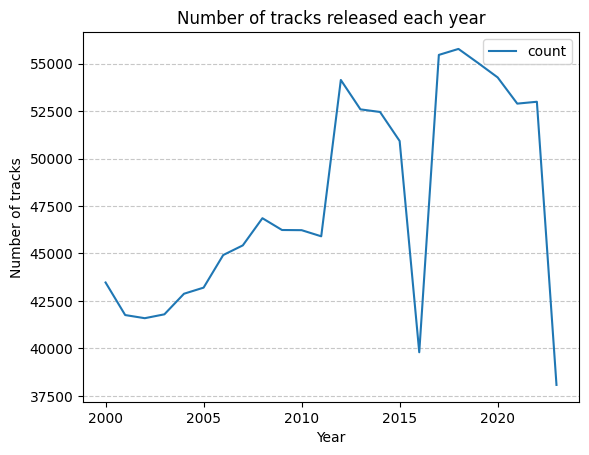

In [48]:
songs_per_year = dataset.groupby('year').size().reset_index(name='count')
print(f"Number of tracks each year:\n{songs_per_year}")

highest_year = songs_per_year.loc[songs_per_year['count'].idxmax()]
print(f"Year with the highest number of tracks: {highest_year['year']} with {highest_year['count']} tracks")

lowest_year = songs_per_year.loc[songs_per_year['count'].idxmin()]
print(f"Year with the lowest number of tracks: {lowest_year['year']} with {lowest_year['count']} tracks")

songs_per_year.plot(x='year', y='count', kind='line', title='Number of tracks released each year')
plt.xlabel('Year')
plt.ylabel('Number of tracks')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

We can see that the number of tracks released has been increasing over the years, with a significant drop in 2016, and a peak in 2018. The number of tracks started to decrease again after hitting the 2018 peak. This could be due to the fact that the dataset was collected in 2023, and the number of tracks released in 2023 is lower than the previous years because the dataset was collected before the year ended.

## Number of artists releasing tracks each year

Number of artists releasing tracks each year:
    year  count
0   2000   5857
1   2001   5759
2   2002   6035
3   2003   6094
4   2004   6600
5   2005   6869
6   2006   7241
7   2007   7723
8   2008   7993
9   2009   8066
10  2010   8482
11  2011   8597
12  2012   9561
13  2013   9799
14  2014  10271
15  2015  10289
16  2016   8975
17  2017  12343
18  2018  13143
19  2019  13821
20  2020  14190
21  2021  13835
22  2022  12722
23  2023  10987
Year with the highest number of artists: 2020 with 14190 artists releasing that year
Year with the lowest number of artists: 2001 with 5759 artists releasing that year


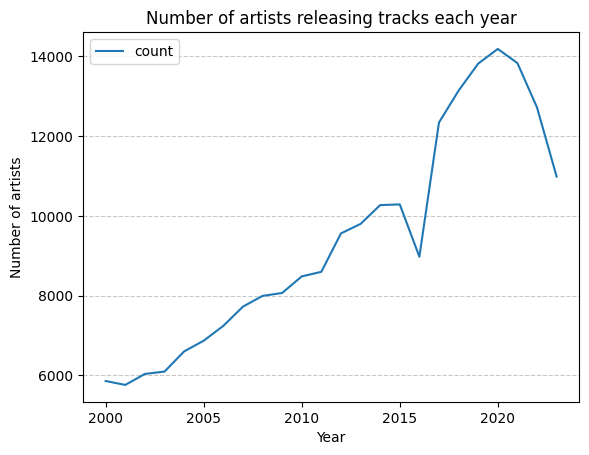

In [55]:
artists_per_year = dataset.groupby('year')['artist_name'].nunique().reset_index(name='count')
print(f"Number of artists releasing tracks each year:\n{artists_per_year}")

highest_year = artists_per_year.loc[artists_per_year['count'].idxmax()]
print(f"Year with the highest number of artists: {highest_year['year']} with {highest_year['count']} artists releasing that year")

lowest_year = artists_per_year.loc[artists_per_year['count'].idxmin()]
print(f"Year with the lowest number of artists: {lowest_year['year']} with {lowest_year['count']} artists releasing that year")

artists_per_year.plot(x='year', y='count', kind='line', title='Number of artists releasing tracks each year')
plt.xlabel('Year')
plt.ylabel('Number of artists')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

We can see that the number of artists releasing tracks has been increasing over the years, which means that more and more arttist decide to release their music. Number of releasing artist has hit an all-time peak in 2020, which could be due to fact that it is easier to release music now than ever before, thanks to the internet and the rise of music streaming platforms.